[1] 0.000202472 0.008068770

SDSPRET

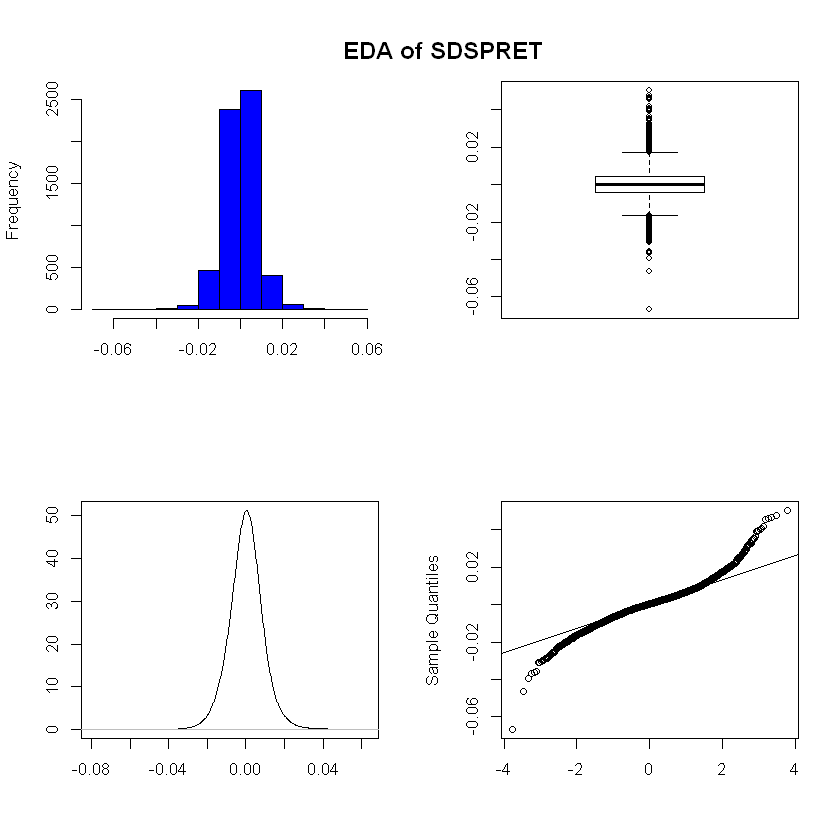

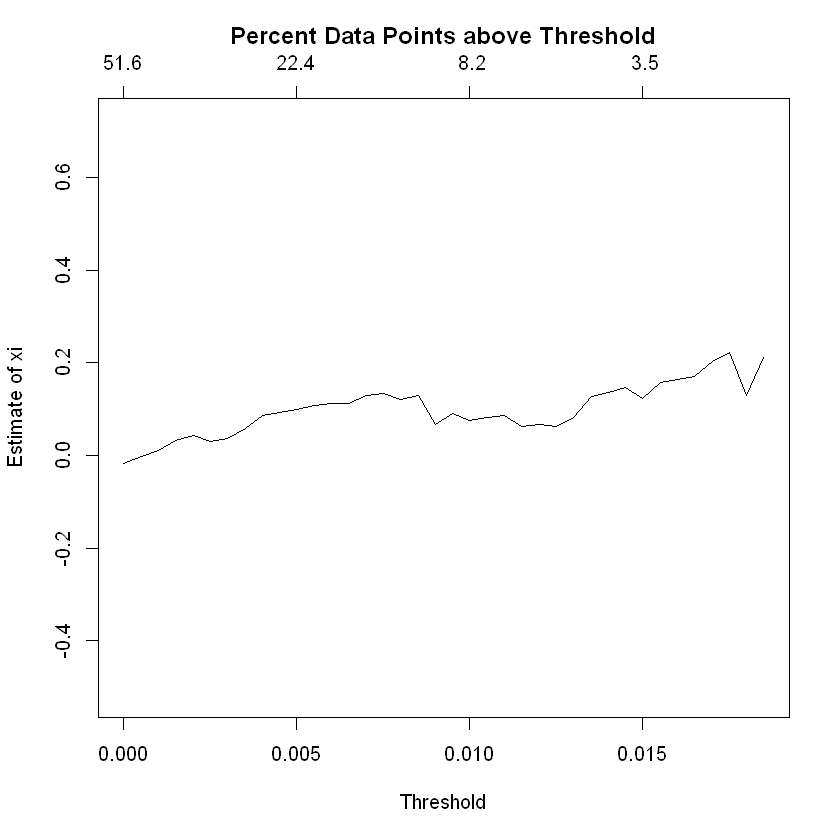

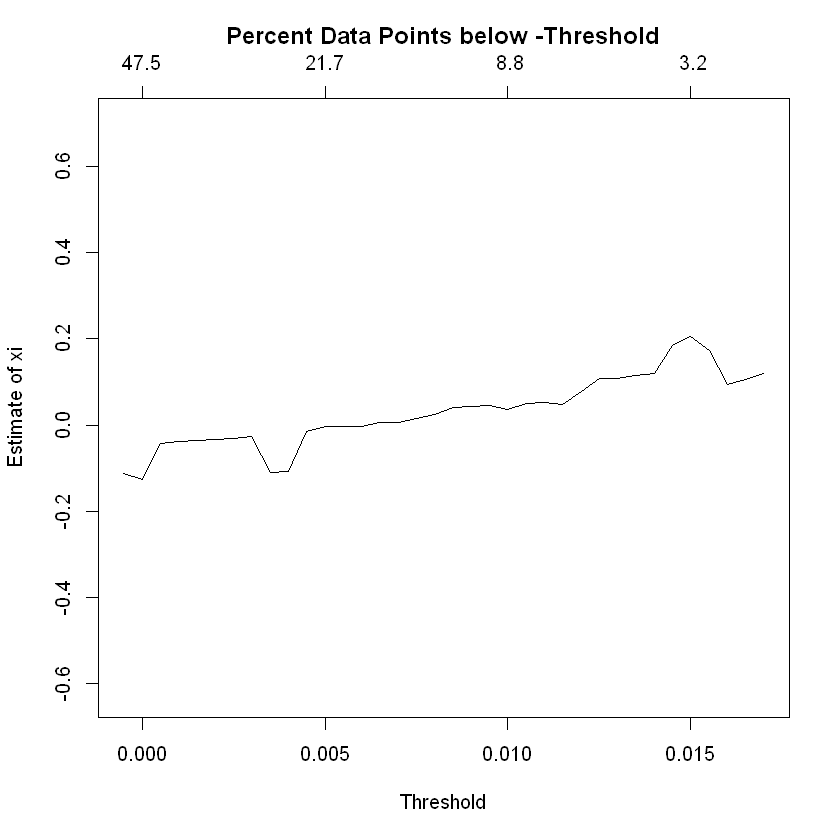

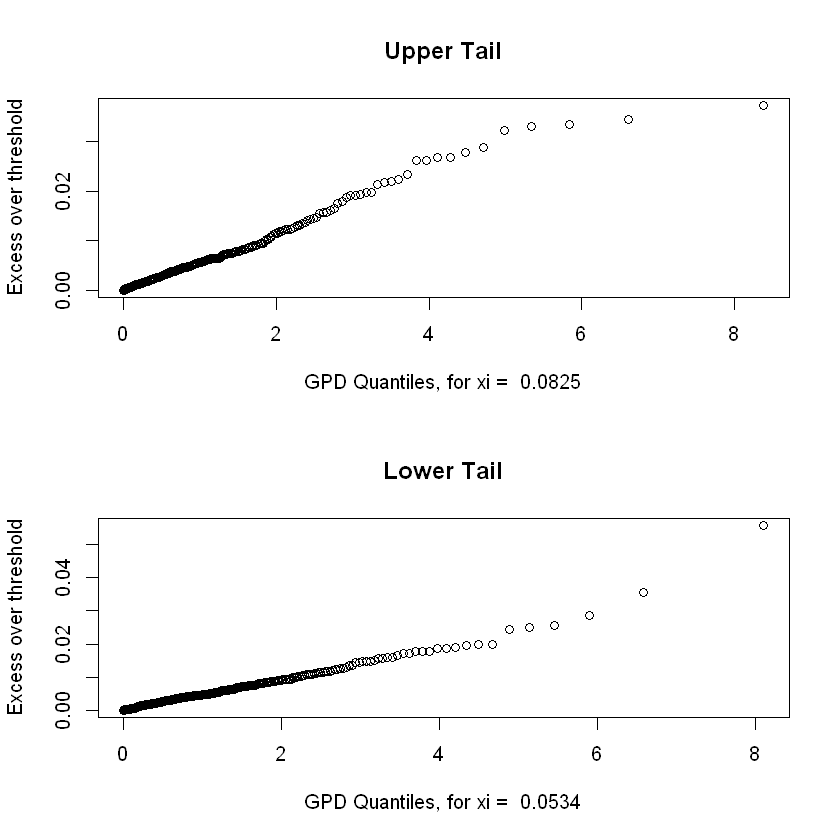

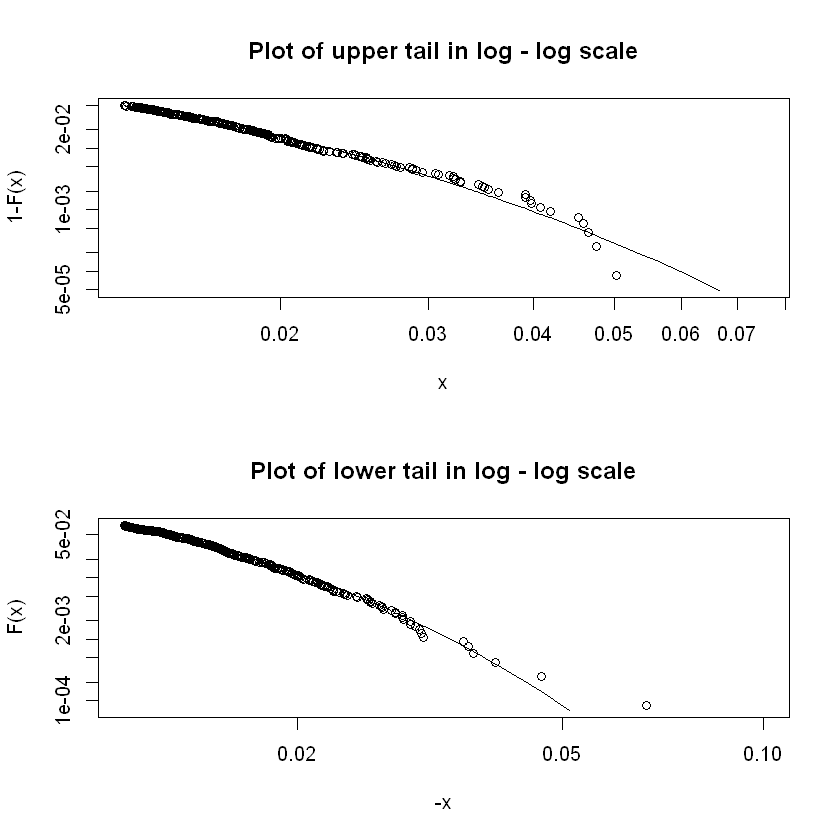

[1] "var_norm "          "0.0205813010391311"

[1] "var_gpd "           "0.0246296128641817"

0.5% 
       "var_gpd_mc " "0.0236559455418291"

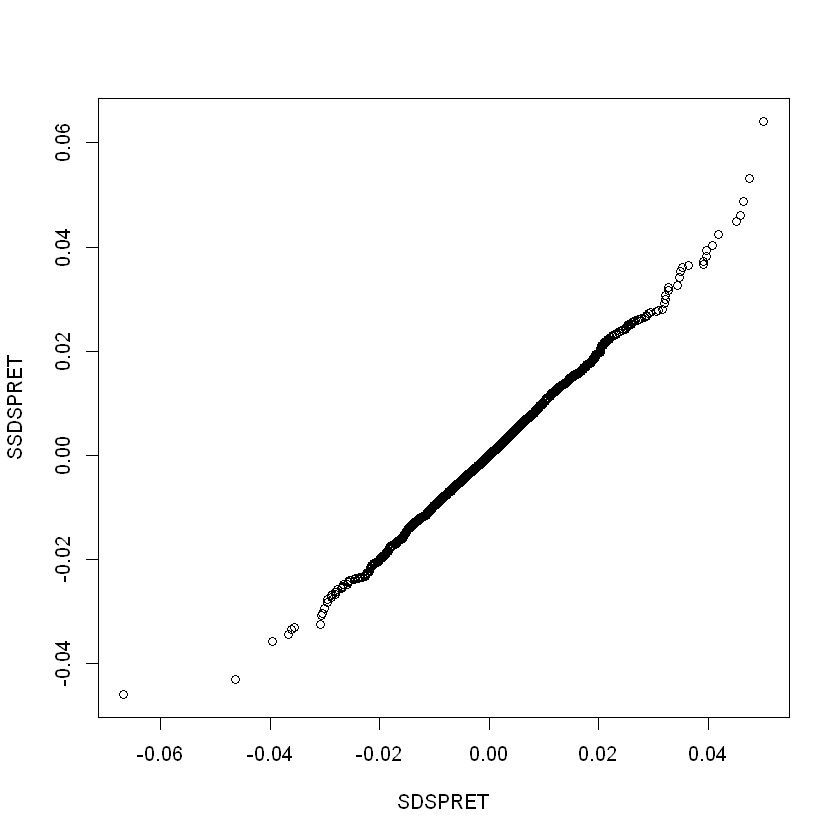

In [6]:
# ISOM4530 HW2 Bai Jiaxin 20327648

# Problem 1
library(Rsafd)
SHAPE.XI <- TRUE
data(DSP)
SDSP <- DSP[1:6000] 

# Part 1
n <- length(SDSP)
SDSPRET <- diff(SDSP)/SDSP[1:n-1]
c(mean(SDSPRET), sd(SDSPRET))

# Part 2 
# Fit the observation using gpd
eda.shape(SDSPRET)
shape.plot(SDSPRET,tail="upper")
shape.plot(SDSPRET,tail="lower")
SDSPRET.est <- fit.gpd(SDSPRET, tail="two",upper=0.013,lower=-0.011)

tailplot(SDSPRET.est)

# When we try to choose the where the tail starts, we actually focus on three things.
# 1, We do not want the tail contain too many observations from the center
# 2. We want the tail to contain enough obervations to ensure the quality of fitting
# 3, We do not want the specification of the tail affect the fitting too much.

# According to shape plot, we can see that for upper tail, the xi curve does not change too much at around 0.012
# and for the lower tail, the curve does not change too much from at around 0.011. Both thresholds are neither 
# contain too much observations from center nor do not have enough observations to ensure the quality of the 
# estimation

# According to the plots from the fit functions, the observations points are almost in a straight line both for 
# the upper tail and the lower tail. That may indicates the GPD is a good fit

# According to the tailplot, we can see that most of the obeservation points are on the line of the GPD, except 
# some extreme points. So we can sure that the GPD fits the data very well

# Part 3
# generate samples from gpd and compare the results
SSDSPRET <- qgpd(SDSPRET.est, runif(10000))
qqplot(SDSPRET,SSDSPRET)

# The qq-plot is almost a straight line, it is much better than using normal distribution, by comparing 
# the qq-plot with empirical distribution against the fitted normal distribution drqwn in part one


# Part 4
# 4.1
q <- 0.005
var_norm <- -qnorm(q, mean = mean(SDSPRET), sd = sd(SDSPRET)) 
c("var_norm ", var_norm)
# 4.2
var_gpd <- -qgpd(SDSPRET.est, q)
c("var_gpd ", var_gpd)
#4.3
var_gpd_mc <-  -quantile(SSDSPRET, q, na.rm = T)
c("var_gpd_mc ", var_gpd_mc)

# Explanation:
# The var_norm is generated from the normal distribution with the same mean and variance as the 
# empirical distribution.var_gpd is the value at risk generated from gpd we that fits the empirical distribution
# and the var_gpd_mc is sampled from that gpd by using monte carlo method. The first value is very differnet from
# The rest of two, because normal distribution does not properly estimate the distribution of the empirical data
# but the gpd gives a good estimation. So they behave differently when calculate the VaR, especially when q is 
# very small. The second and third value is very close, because the third VaR is calculated by observations
# from the gpd distribution, and the second value is directly from that gpd distribution. So they are very close. 

In [7]:
# Problem 2 

# Part 1 
library(Rsafd)
data(UTILITIES)
X <- UTILITIES[ , 1 ]
Y <- UTILITIES[ , 2 ]

c("X mean sd:", mean(X), sd(X))
c("Y mean sd:", mean(Y), sd(Y))
c("Correaltion Coefficient:", cor(X ,Y))

# Part 2
# X ~ N(u_1, sig_1^2)
# Y ~ N(u_2, sig_2^2)
# variables X and Y are jointly normally distributed random variables
# Then X + Y ~ N(u_1+u_2, sig_1^2 + sig_2^2 + 2psig_1sig_2)

sum_mean <- mean(X) + mean(Y)
sum_sd <- sqrt(var(X)+var(Y)+2*cor(X,Y)*sd(X)*sd(Y))
# two percent quantile
sum_quantile <- qnorm(0.02, mean=sum_mean, sd=sum_sd)

diffence_mean <- mean(X) + mean(-Y)
diffence_sd <- sqrt(var(X)+var(-Y)+2*cor(X,-Y)*sd(X)*sd(-Y))
diffence_quantile <- qnorm(0.02, mean = diffence_mean, sd = diffence_sd)

c("sum and diffences 2 percent quantile:", sum_quantile, diffence_quantile)

sum <- X + Y
dif <- X - Y

emp_sum_quantile = quantile(sum, 0.02)
emp_dif_quantile = quantile(dif, 0.02)

c("sum and diffences 2 percent empirical quantile:", emp_sum_quantile, emp_dif_quantile)

[1] "X mean sd:"         "0.002364053194509"  "0.0270494033821803"

[1] "Y mean sd:"           "0.000511941637552868" "0.0363912022002402"

[1] "Correaltion Coefficient:" "0.544636517622221"

[1] "sum and diffences 2 percent quantile:"
[2] "-0.111991321178014"                   
[3] "-0.0625633778048898"

"sum and diffences 2 percent empirical quantile:" 
                                               2% 
                             "-0.101462064610979" 
                                               2% 
                            "-0.0581885519758757"

[1] 0.07149251

[1] 0.9704301

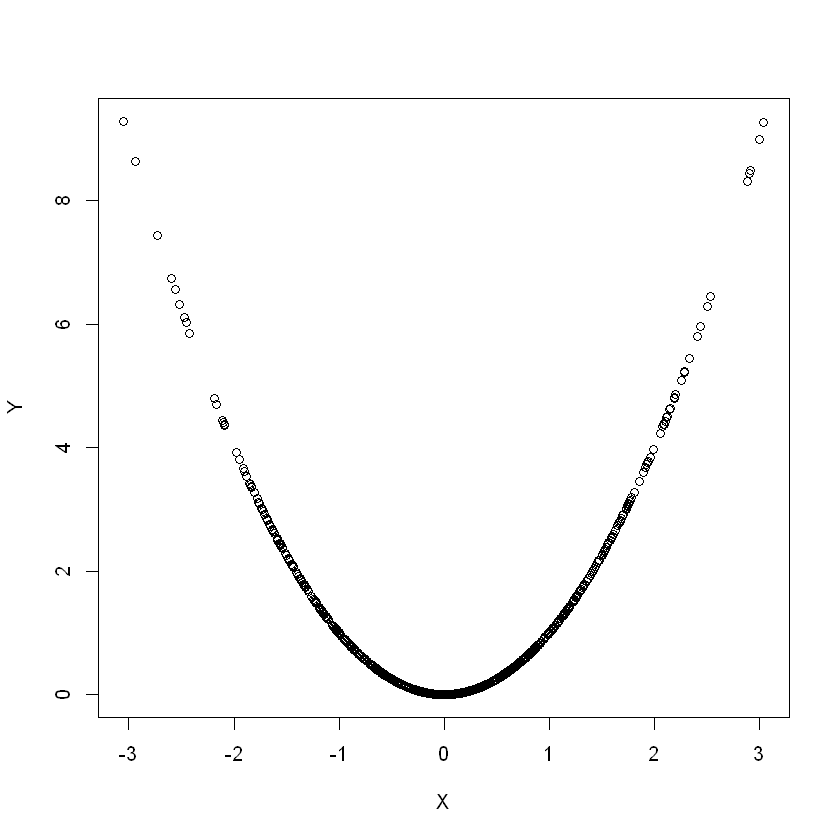

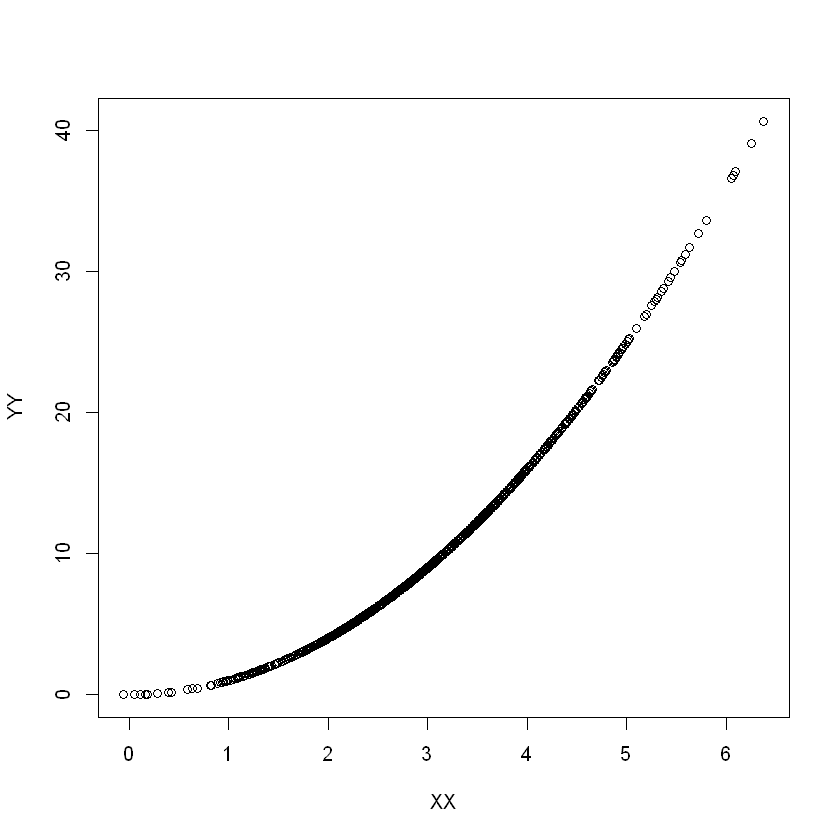

In [1]:
# Problem 3
# Part 1
X <- rnorm(mean=0, sd = 1, 1024)
Y <- X*X
cor(X, Y)

plot(x=X, y=Y, type="p",xlim=range(X),ylim=range(Y))
# Part 1
XX <- rnorm(mean=3, sd = 1, 1024)
YY <- XX*XX
cor(XX, YY)
plot(x=XX, y=YY, type="p",xlim=range(XX),ylim=range(YY))
